In [ ]:
pip install praw

In [ ]:
import praw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

import logging
import prawcore

In [ ]:
# Initializing a client instance using the PRAW (Python Reddit API Wrapper) library.
reddit = praw.Reddit(client_id='xR6PpHbcxIfLDxN2bj3xNg',
    client_secret='pmXB9GTydBGY7nATX_pcaFDGMgwsOw',
    user_agent='smdmproject by smdmgroup2',
    username='smdmgroup2',
    password='susmdmproject')

In [ ]:
# Define functions for future data scraping

In [ ]:
#Fetch and process top posts from a specified subreddit using the PRAW library. Returns a pandas DataFrame containing details of the posts.
'''def get_posts(sub_name, n):
    subreddit = reddit.subreddit(sub_name)
    posts_list = []

    for submission in subreddit.top(limit=n):
        info_list = []
        info_list.append(submission.id)   # Output: the submission's title
        info_list.append(submission.score)  # Output: the submission's score
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(submission.subreddit)
        posts_list.append(info_list)

    a = sorted(posts_list, key=lambda x: x[1], reverse = True)
    posts_df = pd.DataFrame(a, columns = ['id', 'score', 'author', 'num_comments', 'subreddit'])
    return posts_df '''

"def get_posts(sub_name, n):\n    subreddit = reddit.subreddit(sub_name)\n    posts_list = []\n\n    for submission in subreddit.top(limit=n):\n        info_list = []\n        info_list.append(submission.id)   # Output: the submission's title\n        info_list.append(submission.score)  # Output: the submission's score\n        info_list.append(str(submission.author))\n        info_list.append(submission.num_comments)\n        info_list.append(submission.subreddit)\n        posts_list.append(info_list)\n\n    a = sorted(posts_list, key=lambda x: x[1], reverse = True)\n    posts_df = pd.DataFrame(a, columns = ['id', 'score', 'author', 'num_comments', 'subreddit'])\n    return posts_df "

In [ ]:
#Fetch and process top posts from a specified subreddit using the PRAW library. Returns a pandas DataFrame containing details of the posts.
def get_posts(subreddit_name, post_count):
    target_subreddit = reddit.subreddit(subreddit_name)
    top_posts = []

    for post in target_subreddit.top(limit=post_count):
        post_details = {
            'id': post.id,
            'score': post.score,
            'author': str(post.author),
            'num_comments': post.num_comments,
            'subreddit': post.subreddit
        }
        top_posts.append(post_details)

    sorted_posts = sorted(top_posts, key=lambda post: post['score'], reverse=True)
    sorted_posts_df = pd.DataFrame(sorted_posts)
    return sorted_posts_df


In [ ]:
'''def get_comments(subm_id, n):

    com_list = []
    submission = reddit.submission(id = subm_id)
    i = 0
    for comment in submission.comments:
        info_list = []
            # Top 3 comments for each submission
        if i <= n:
            info_list.append(comment.id)
            info_list.append(comment.score)
            info_list.append(comment.author)
            info_list.append(submission.subreddit)
            #info_list.append(submission.comments.list()[i].body)
            i += 1
            com_list.append(info_list)
        else:
            break

    a = sorted(com_list, key=lambda x: x[1], reverse = True)
    com_df = pd.DataFrame(a)
    return com_df '''

'def get_comments(subm_id, n):\n\n    com_list = []\n    submission = reddit.submission(id = subm_id)\n    i = 0\n    for comment in submission.comments:\n        info_list = []\n            # Top 3 comments for each submission\n        if i <= n:\n            info_list.append(comment.id)\n            info_list.append(comment.score)\n            info_list.append(comment.author)\n            info_list.append(submission.subreddit)\n            #info_list.append(submission.comments.list()[i].body)\n            i += 1\n            com_list.append(info_list)\n        else:\n            break\n\n    a = sorted(com_list, key=lambda x: x[1], reverse = True)\n    com_df = pd.DataFrame(a)\n    return com_df '

In [ ]:
#Fetches and returns a sorted DataFrame of top comments from a specific Reddit post.
def get_comments(post_id, max_comments):
    comments_collected = []
    post = reddit.submission(id=post_id)
    count = 0

    for comment in post.comments:
        if count < max_comments:
            comment_details = {
                'comment_id': comment.id,
                'comment_score': comment.score,
                'comment_author': str(comment.author),
                'related_subreddit': post.subreddit.name
            }
            comments_collected.append(comment_details)
            count += 1
        else:
            break

    sorted_comments = sorted(comments_collected, key=lambda item: item['comment_score'], reverse=True)
    comments_data_frame = pd.DataFrame(sorted_comments)
    return comments_data_frame


# Initial Analysis of r/all

In [ ]:
# First we scrape 1000 posts, then using submission id, scrape most popular comments of every post and append it to the
# dataframe with comments
df = get_posts('all', 1000)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:

df.shape # Explore posts dataframe

(1000, 5)

In [ ]:
df.head(10)

,id,score,author,num_comments,subreddit
0,l8rf4k,482067,SomeGuyInDeutschland,13937,wallstreetbets
1,haucpf,438833,ReallyRickAstley,18997,pics
2,62sjuh,433290,serventofgaben,5104,movies
3,gyfedz,403016,rextraneous,4236,memes
4,jptqj9,365127,throwawaynumber53,28393,news
5,ig9u4z,338412,BlackAdder7,3281,memes
6,l6wu59,336401,vrweensy,12889,wallstreetbets
7,90bu6w,330541,FootLoosePickleJuice,4297,aww
8,7mjw12,308583,the_Diva,2453,funny
9,l78uct,297637,DeepFuckingValue,23109,wallstreetbets


In [ ]:
df.author.nunique()

829

In [ ]:

df.subreddit.nunique()

58

In [ ]:
df['score'].describe()

count      1000.000000
mean     175712.324000
std       34080.972652
min      144840.000000
25%      154528.250000
50%      165630.000000
75%      185306.000000
max      482067.000000
Name: score, dtype: float64

In [ ]:
df['num_comments'].describe()

count     1000.000000
mean      3753.014000
std       4918.462121
min          2.000000
25%       1395.000000
50%       2308.500000
75%       4279.000000
max      81647.000000
Name: num_comments, dtype: float64

<Axes: xlabel='score', ylabel='num_comments'>

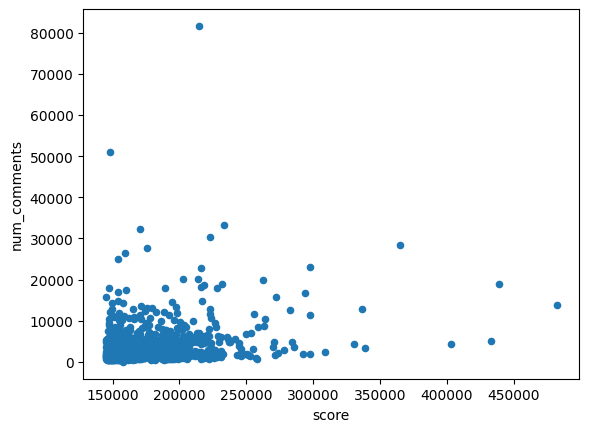

In [ ]:
df.plot('score', 'num_comments', kind = 'scatter' )

# Analysis based on a r/GTA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

gta_df = get_posts('GTA', 500) # This is where you can define any subreddit and
                                            # run all the cells to get the network graph

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
gta_df.head(10)

,id,score,author,num_comments,subreddit
0,18axagr,19798,SuitingUncle620,2892,GTA
1,qdg2v8,11049,None,1507,GTA
2,xltrmf,10121,Chakluxe,660,GTA
3,qudbg5,10062,PeacockBlooms,331,GTA
4,18gr2az,9846,Juliuscrevil95,374,GTA
5,16phe8k,9434,TraditonalRest,780,GTA
6,18a0npv,9091,KVKvKvLL,4445,GTA
7,qzu4yb,8937,None,256,GTA
8,wztvtk,8221,TwiliciousREEE,292,GTA
9,rfjybu,8221,WadieXkiller,806,GTA


from matplotlib import pyplot as plt
_df_0['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_comments'].plot(kind='hist', bins=20, title='num_comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='score', y='num_comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['num_comments'].plot(kind='line', figsize=(8, 4), title='num_comments')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
gta_df.author.nunique() # Out of 500, 434 are unique

413

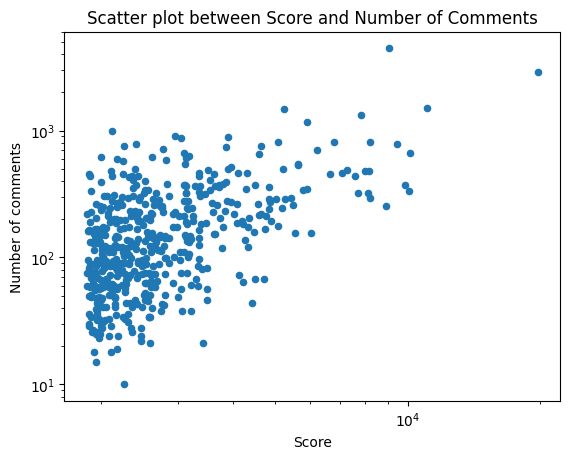

In [ ]:
# See the relationship between comments and upvotes
ax = gta_df.plot('score', 'num_comments', kind = 'scatter',logx=True, logy=True, title='Scatter plot between Score and Number of Comments')
ax.set(xlabel="Score", ylabel="Number of comments")
plt.savefig("ScatterPlot",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [ ]:
repeating = gta_df[gta_df.duplicated(['author'], keep = False)] # Only take users who posted more than once

In [ ]:
repeating = repeating[repeating.author != 'None'] # Get rid of deleted users

In [ ]:
repeating.author.nunique() # Out of 500 posts, this is the amount of people who posted more than once

31

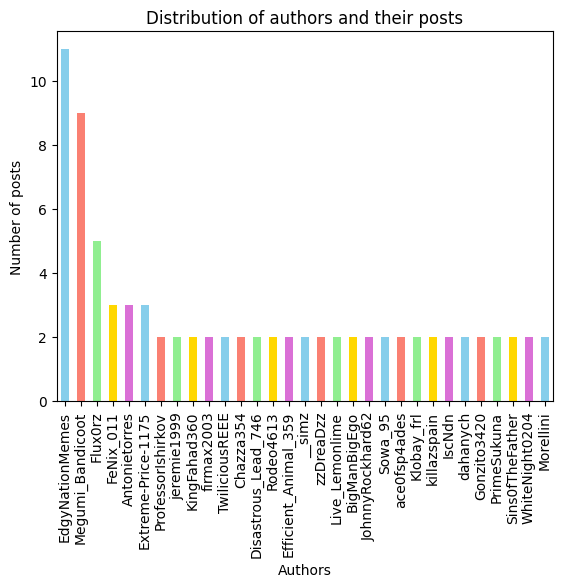

In [ ]:
# See the distrubution of authors and their posts
authors = repeating['author'].value_counts()

# Generating different colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orchid']  # Add more colors as needed

ax = authors.plot(kind='bar', title='Distribution of authors and their posts', color=colors)
ax.set(xlabel="Authors", ylabel="Number of posts")

# Save the plot as an image
plt.savefig("Bargraph.png", dpi=150, bbox_inches='tight', pad_inches=0.5)


In [ ]:
# Compiling a list of authors that appeared more than once on subreddit's top of all times
# (Used for network graph and for get_user_posts function)
u_authors = list(repeating.author.unique())

In [ ]:
u_authors

['TwiliciousREEE',
 'Sowa_95',
 'WhiteNight0204',
 'Sins0fTheFather',
 'Flux0rz',
 'Antonietorres',
 'PrimeSukuna',
 'Gonzito3420',
 'dahanych',
 'IscNdn',
 'killazspain',
 'EdgyNationMemes',
 'Extreme-Price-1175',
 'Klobay_frl',
 'ace0fsp4ades',
 'BigManBigEgo',
 'Megumi_Bandicoot',
 'JohnnyRockhard62',
 'Chazza354',
 'FeNix_011',
 'jeremie1999',
 'KingFahad360',
 'firmax2003',
 'ProfessorIshirkov',
 'Live_Lemonlime',
 'Disastrous_Lead_746',
 'Rodeo4613',
 'Efficient_Animal_359',
 '__simz',
 'zzDreaDzz',
 'Morellini']

In [ ]:


'''def get_user_posts(author, n):
    try:
        redditor = reddit.redditor(author)
        user_posts_list = []

        for submission in redditor.submissions.top(limit=n):
            info_list = [submission.id, submission.score, str(submission.author),
                         submission.num_comments, str(submission.subreddit)]
            user_posts_list.append(info_list)

        user_posts_df = pd.DataFrame(user_posts_list, columns=['id', 'score', 'author', 'num_comments', 'subreddit'])
        return user_posts_df

    except prawcore.exceptions.NotFound:
        logging.warning(f"User '{author}' not found or access is restricted")
        return pd.DataFrame()

    except Exception as e:
        logging.error(f"An error occurred: {e}")
        return pd.DataFrame()'''


'def get_user_posts(author, n):\n    try:\n        redditor = reddit.redditor(author)\n        user_posts_list = []\n\n        for submission in redditor.submissions.top(limit=n):\n            info_list = [submission.id, submission.score, str(submission.author),\n                         submission.num_comments, str(submission.subreddit)]\n            user_posts_list.append(info_list)\n\n        user_posts_df = pd.DataFrame(user_posts_list, columns=[\'id\', \'score\', \'author\', \'num_comments\', \'subreddit\'])\n        return user_posts_df\n\n    except prawcore.exceptions.NotFound:\n        logging.warning(f"User \'{author}\' not found or access is restricted")\n        return pd.DataFrame()\n\n    except Exception as e:\n        logging.error(f"An error occurred: {e}")\n        return pd.DataFrame()'

In [ ]:
#Retrieves and returns a DataFrame of top posts made by a specified Reddit user.
def get_user_posts(username, post_limit):
    try:
        user = reddit.redditor(username)
        posts_data = []

        for post in user.submissions.top(limit=post_limit):
            post_info = {
                'Post ID': post.id,
                'Score': post.score,
                'Author': str(post.author),
                'Number of Comments': post.num_comments,
                'Subreddit': str(post.subreddit)
            }
            posts_data.append(post_info)

        posts_dataframe = pd.DataFrame(posts_data)
        return posts_dataframe

    except prawcore.exceptions.NotFound:
        logging.warning(f"No data found for Reddit user: {username}")
        return pd.DataFrame()

    except Exception as ex:
        logging.error(f"Error encountered: {ex}")
        return pd.DataFrame()


In [ ]:
authors_df =  pd.DataFrame() # Makes an empty dataframe
authors_df = authors_df.fillna(0)
for u in u_authors: # Loops through every "influencer" user and gets 10 top posts per user
    c = get_user_posts(u, 10)
    authors_df = pd.concat([authors_df, c])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

ERROR:root:Error encountered: received 403 HTTP response
It is strongly recommended to use Async PRAW: https://async

In [ ]:
# authors_df = authors_df.rename(index=str, #renaming column names
#                                columns={0: "id", 1: "score", 2: "author", 3: "num_comments", 4: "subreddit"})

In [ ]:
authors_df.head(10) # Dataframe of other subreddits where authors posted

,Post ID,Score,Author,Number of Comments,Subreddit
0,lghoh3,300,TwiliciousREEE,27,NoMansSkyTheGame
1,wzw5kq,12807,TwiliciousREEE,256,GamePhysics
2,10btwni,9211,TwiliciousREEE,137,mildlyinteresting
3,wztvtk,8223,TwiliciousREEE,292,GTA
4,wvudbm,6361,TwiliciousREEE,314,mildlyinteresting
5,l8jzla,4360,TwiliciousREEE,72,ich_iel
6,18dnci7,4212,TwiliciousREEE,1325,GTA6
7,usb6eb,3351,TwiliciousREEE,244,starcitizen
8,yhmnzo,2657,TwiliciousREEE,68,GamePhysics
9,188a157,2327,TwiliciousREEE,39,GTA6


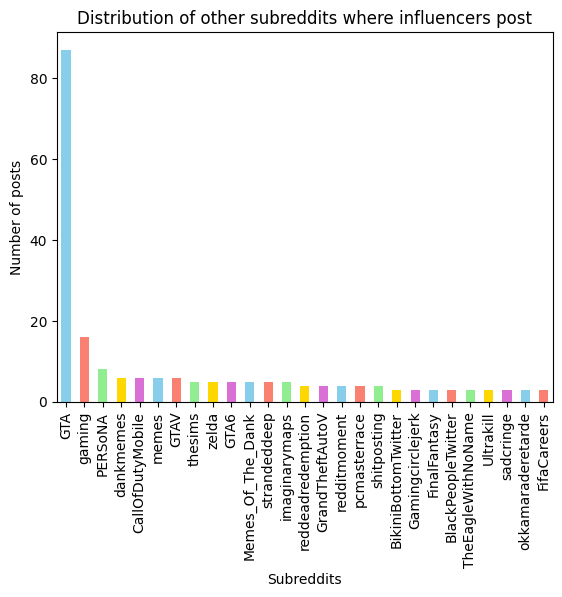

In [ ]:
counts = authors_df['Subreddit'].value_counts()
# Only plot the subreddits that appear more than twice
filtered_subreddits = authors_df[authors_df['Subreddit'].isin(counts[counts > 2].index)]

# Get the value counts of subreddits after filtering
subreddit_counts = filtered_subreddits['Subreddit'].value_counts()

# Generate different colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orchid']  # Add more colors as needed

ax = subreddit_counts.plot(kind='bar', title='Distribution of other subreddits where influencers post', color=colors)
ax.set(xlabel="Subreddits", ylabel="Number of posts")

# Save the plot as an image
plt.savefig("BargraphSubreddits.png", dpi=150, bbox_inches='tight', pad_inches=0.5)

# Network Analysis

## Initial approach

In [ ]:
n_df = authors_df[['Author', 'Subreddit']] # Create a dataframe for network graph purposes
n_df.head()

,Author,Subreddit
0,TwiliciousREEE,NoMansSkyTheGame
1,TwiliciousREEE,GamePhysics
2,TwiliciousREEE,mildlyinteresting
3,TwiliciousREEE,GTA
4,TwiliciousREEE,mildlyinteresting


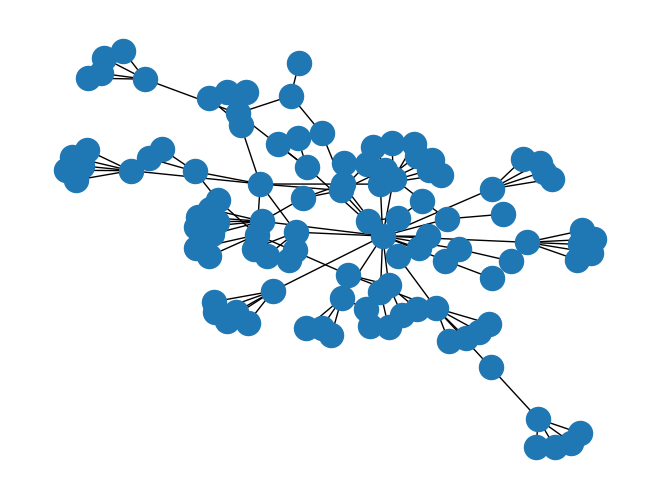

In [ ]:
g = nx.from_pandas_edgelist(n_df, source='Author', target='Subreddit') # Initial ugly approach, decided to keep it
nx.draw(g)

## Final Approach

In [ ]:
subs = list(n_df.Subreddit.unique()) # Make list of unique subreddits to use in network graph

In [ ]:
subs

['NoMansSkyTheGame',
 'GamePhysics',
 'mildlyinteresting',
 'GTA',
 'ich_iel',
 'GTA6',
 'starcitizen',
 'Subnautica_Below_Zero',
 'strandeddeep',
 'DaysGone',
 'masseffect',
 'youtubehaiku',
 'czechmemes',
 'okkamaraderetarde',
 'czech',
 'BeamNG',
 'gifs',
 'gaming',
 'WTF',
 'cars',
 'tf2',
 'Komi_san',
 'PERSoNA',
 'Spiderman',
 'SpidermanPS4',
 'cyberpunkgame',
 'pcgaming',
 'assassinscreed',
 'PS4',
 'Unexpected',
 'BatmanArkham',
 'pics',
 'marvelstudios',
 'nostalgia',
 'cosplay',
 'GrandTheftAutoV',
 'reddeadredemption',
 'avicii',
 'dankmemes',
 'playstation',
 'pokemonmemes',
 'memes',
 'GTAV',
 'redditmoment',
 'notinteresting',
 'cults',
 'zelda',
 'FinalFantasy',
 'GenshinImpactHentai',
 'sadcringe',
 '196',
 'Ultrakill',
 'yakuzagames',
 'halo',
 'iamverysmart',
 'Kanye',
 'gamecollecting',
 'thelastofus',
 'SmallYoutubers',
 'pcmasterrace',
 'witcher',
 'shitposting',
 'me_irl',
 'dankvideos',
 'MemeVideos',
 'NonCredibleDefense',
 'TheEagleWithNoName',
 'cursedcomments

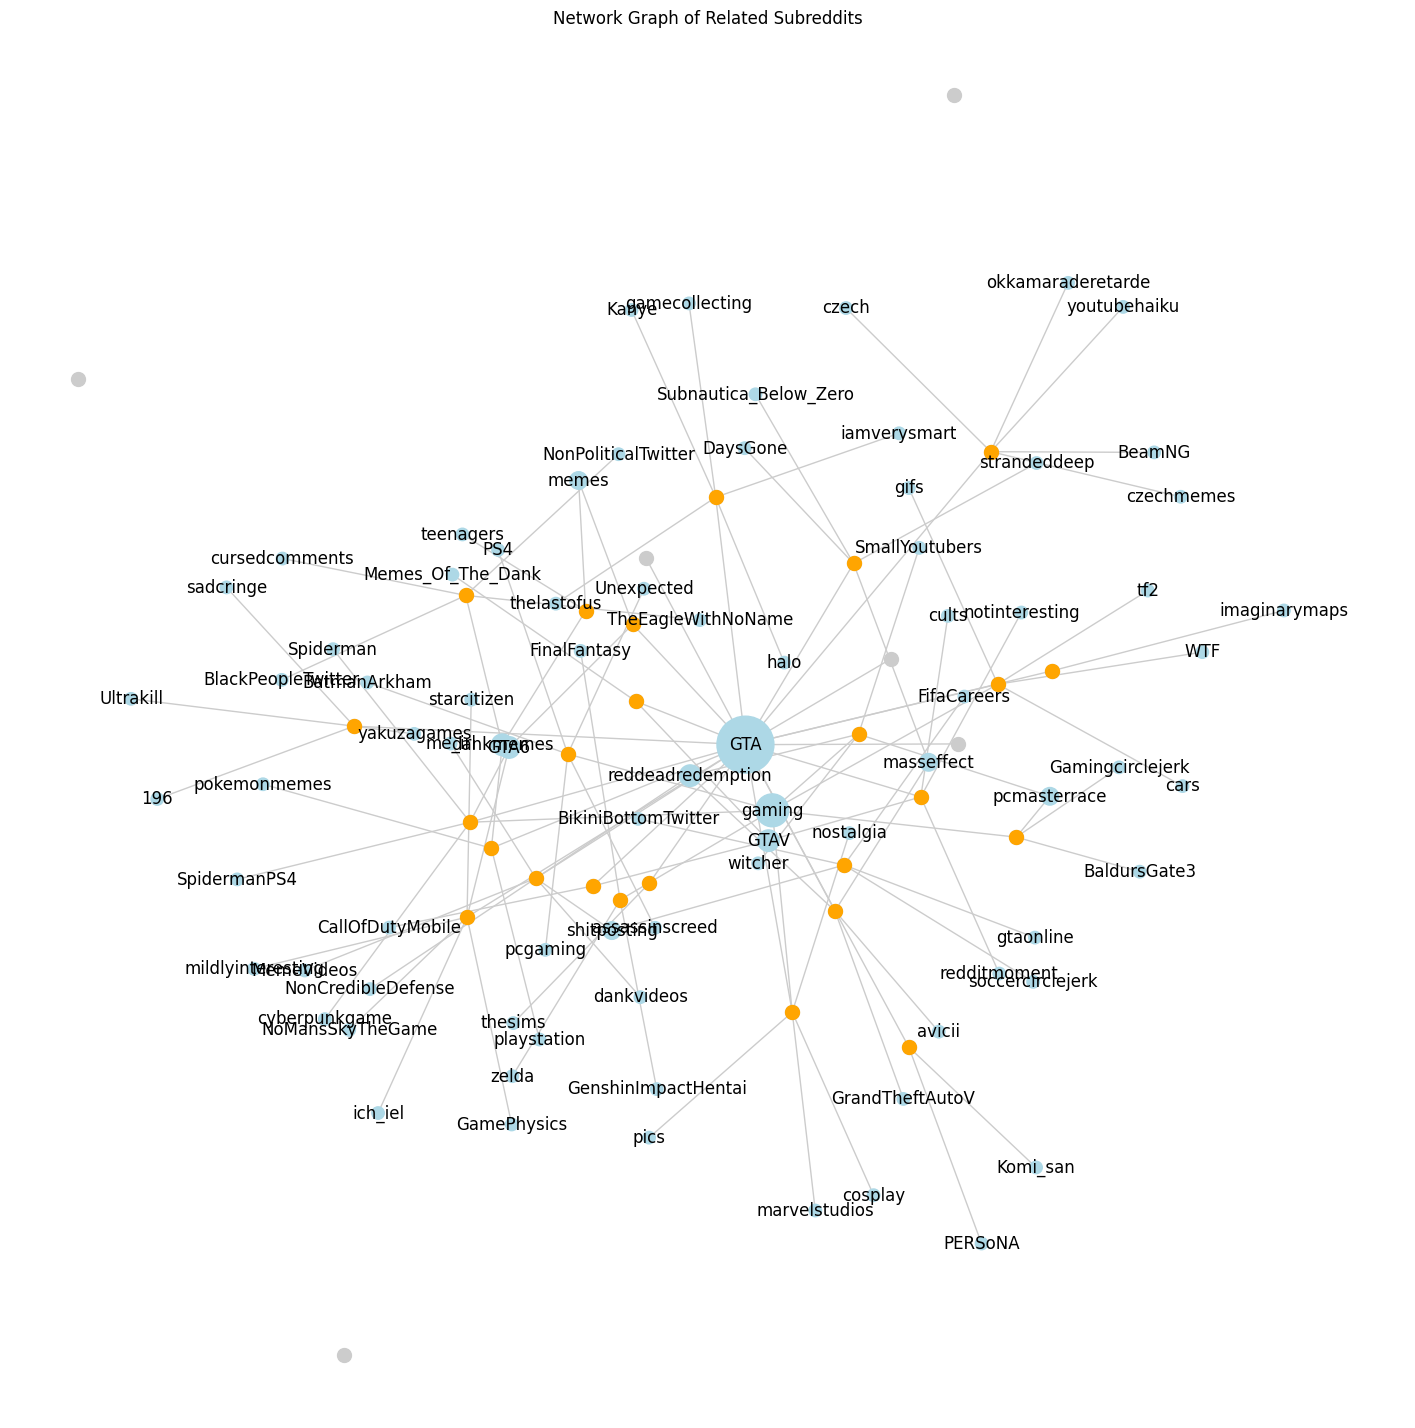

In [ ]:


plt.figure(figsize=(18, 18))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(n_df, source='Author', target='Subreddit')

# Create a layout for nodes
layout = nx.spring_layout(g, iterations=50, scale=10)

# Initialize a flag to track if new nodes are added
pos_needed = False

# Function to add missing nodes and compute positions
def update_graph_and_layout(node_list):
    global pos_needed
    updated_list = []
    for node in node_list:
        if node not in g:
            g.add_node(node)
            pos_needed = True
        if node not in layout:
            pos_needed = True
        updated_list.append(node)
    return updated_list

# Update subs and u_authors lists
subs = update_graph_and_layout(subs)
u_authors = update_graph_and_layout(u_authors)

# Recompute positions if new nodes were added
if pos_needed:
    layout = nx.spring_layout(g, iterations=10, scale=10)

# Draw the parts we want
# Subreddits
sub_size = [g.degree(sub) * 80 for sub in subs]
nx.draw_networkx_nodes(g, layout, nodelist=subs, node_size=sub_size, node_color='lightblue')

# All authors
nx.draw_networkx_nodes(g, layout, nodelist=u_authors, node_color='#cccccc', node_size=100)

# Highly connected influencers
popular_people = [person for person in u_authors if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

# Edges
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

# Labels for subreddits
node_labels = dict(zip(subs, subs))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# Finalize plot
plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph", bbox_inches='tight', pad_inches=0.5)
plt.show()


In [ ]:
g.degree('movies') # To check the number of out-degrees for a subreddit, if interested

DegreeView({})